<a href="https://colab.research.google.com/github/piyushy1/Gradientor/blob/main/Drichlet_Distribution/drichlet_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drichlet Distribution

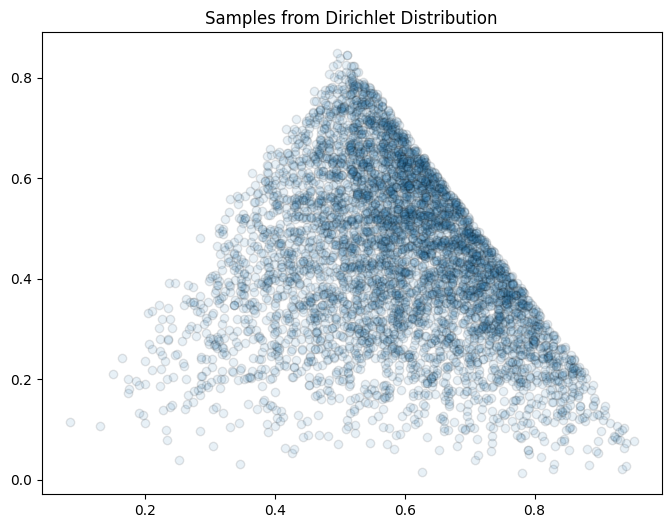

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# Parameters for Dirichlet distribution
alpha = [2, 3, 1]

# Generate samples
samples = dirichlet.rvs(alpha, size=5000)

# Plot the samples on a 2D simplex (triangular plot)
def plot_simplex(samples):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    # Convert to barycentric coordinates for plotting
    x = samples[:, 0] + 0.5 * samples[:, 1]
    y = np.sqrt(3) / 2 * samples[:, 1]

    ax.scatter(x, y, alpha=0.1, edgecolor='k')
    ax.set_title('Samples from Dirichlet Distribution')
    plt.show()

plot_simplex(samples)